# 23 Nov 2024
NLP:

process:

[input text] and follow following steps-->

lexical analysis + Synctactic analysis

1. sentence segmentation : break large text into different sentences

2. word tokenization : either find total words frequency or make it into a root word

3. Stemming / lemmatization

4. Stop word removal

create model:
5. Frequency model

6. Dependency Parsing: How words are related to each other.

7. POS tagging: Part of Speech tags(grammer:verb,noun,adjective etc)

8. Named Entity Recognition [NER]: Find important things e.g. Apple is a red. 'Apple' becomes imoprtant

9. Chunking : To collect individual piece of information and group them into a large text.

In [ ]:
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:


text = "Natural Language Processing is fascinating ,and + very 'cool as it is Natural how things get processed!"
tokens = word_tokenize(text)
print(f"original text : {text}")
print(f"\ntokenized text :\n {tokens}")



original text : Natural Language Processing is fascinating ,and + very 'cool as it is Natural how things get processed!

tokenized text :
 ['Natural', 'Language', 'Processing', 'is', 'fascinating', ',', 'and', '+', 'very', "'cool", 'as', 'it', 'is', 'Natural', 'how', 'things', 'get', 'processed', '!']


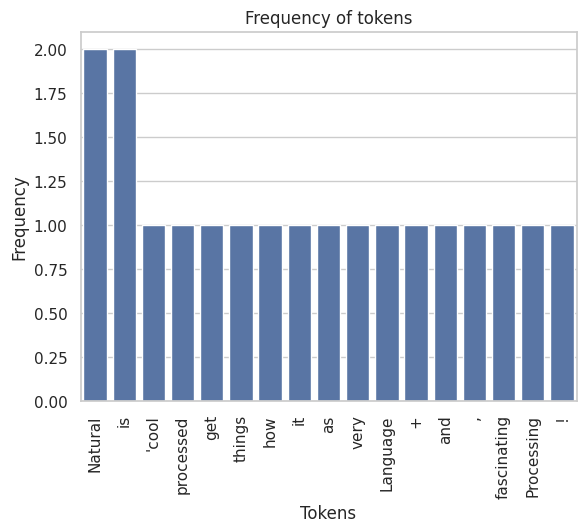

In [ ]:
# visualize the frequency
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style = "whitegrid")
token_freq = pd.Series(tokens).value_counts()
token_freq
sns.barplot(x = token_freq.index, y = token_freq.values)
plt.title("Frequency of tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# remove punctuation
import re
parser = r'\w+' # w: only words 0 or more
filtered_tokens = re.findall(parser, text)
print(f"original text : {text}")
print(f"filtered text :\n {filtered_tokens}")



original text : Natural Language Processing is fascinating ,and + very 'cool as it is Natural how things get processed!
filtered text :
 ['Natural', 'Language', 'Processing', 'is', 'fascinating', 'and', 'very', 'cool', 'as', 'it', 'is', 'Natural', 'how', 'things', 'get', 'processed']


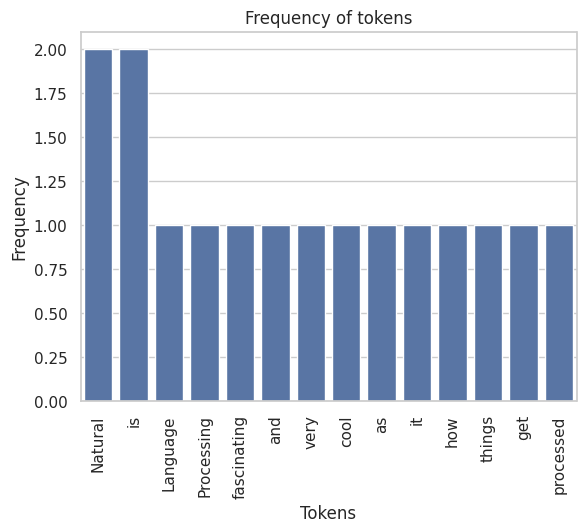

In [ ]:
# visualise
token_freq = pd.Series(filtered_tokens).value_counts()
token_freq
sns.barplot(x = token_freq.index, y = token_freq.values)
plt.title("Frequency of tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# remove the stop words
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

filtered_tokens = [word for word in filtered_tokens if word.lower() not in stop_words]
print(f"original text : {text}")
print(f"filtered text :\n {filtered_tokens}")

original text : Natural Language Processing is fascinating ,and + very 'cool as it is Natural how things get processed!
filtered text :
 ['Natural', 'Language', 'Processing', 'fascinating', 'cool', 'Natural', 'things', 'get', 'processed']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


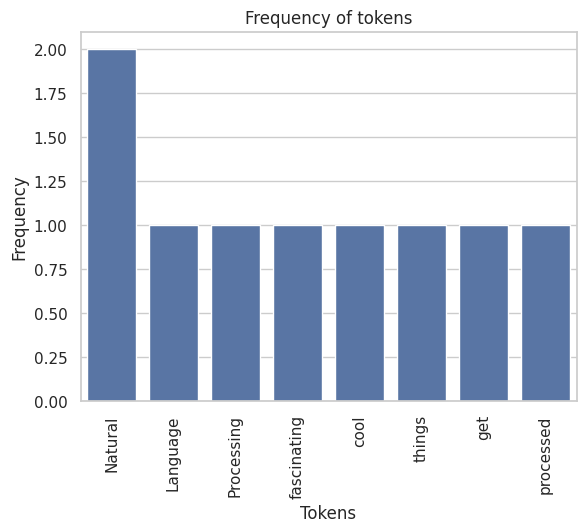

In [ ]:
# Visualise it again
token_freq = pd.Series(filtered_tokens).value_counts()
token_freq
sns.barplot(x = token_freq.index, y = token_freq.values)
plt.title("Frequency of tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# Dependency parsing
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

for token in doc:
    print(token.text,"\t",token.dep_, token.head.text)

    # visualise
    from spacy import displacy
    spacy.displacy.render(doc, style = "dep", jupyter = True)





Natural 	 compound Language


Language 	 compound Processing


Processing 	 nsubj is


is 	 ROOT is


fascinating 	 acomp is


, 	 punct is


and 	 cc is


+ 	 punct processed


very 	 advmod +


' 	 punct cool


cool 	 conj +


as 	 mark is


it 	 nsubj is


is 	 advcl cool


Natural 	 acomp is


how 	 advmod processed


things 	 nsubjpass processed


get 	 auxpass processed


processed 	 conj is


! 	 punct processed


In [ ]:
# canonicallization : individual words compounded together . it is part of dependency parsing.

In [ ]:
# pos tagging
for token in doc:
    print(token.text,"\t",token.pos_)

    # visualise
    from spacy import displacy
    spacy.displacy.render(doc, style = "dep", jupyter = True)

Natural 	 PROPN


Language 	 PROPN


Processing 	 PROPN


is 	 AUX


fascinating 	 ADJ


, 	 PUNCT


and 	 CCONJ


+ 	 ADJ


very 	 ADV


' 	 PUNCT


cool 	 ADJ


as 	 SCONJ


it 	 PRON


is 	 AUX


Natural 	 ADJ


how 	 SCONJ


things 	 NOUN


get 	 AUX


processed 	 VERB


! 	 PUNCT


In [ ]:
article = """Natural Language Processing (NLP) Courses
Natural Language Processing (NLP) courses focus on the interaction between computers and humans through language. They cover text processing, sentiment analysis, and language modeling. NLP is crucial for building applications that understand and interpret human language, making it essential for AI researchers and developers."""


In [ ]:
doc = nlp(article)

for ent in doc.ents:
    print(ent.text,"\t",ent.label_)
# visualise
from spacy import displacy
spacy.displacy.render(doc, style = "ent")

Natural Language Processing ( 	 WORK_OF_ART
NLP 	 ORG
NLP 	 ORG
AI 	 ORG


In [ ]:
# ner
for ent in doc.ents:
    print(ent.text,"\t",ent.label_)
# visualise
from spacy import displacy
spacy.displacy.render(doc, style = "ent")

# N-gram models
# :sequence of adjacent symbols that can be taken as a lexime or overall sentence maker. it is suggestion that what would be the probability of the next predicted word to come.

In [ ]:
# n-gram models
from nltk import bigrams,trigrams,ngrams
from collections import Counter,defaultdict
import nltk
from nltk.corpus import reuters
nltk.download('reuters')

# load the reuters corpus
reuters_corpus = reuters

# tokenize
words = nltk.word_tokenize(''.join(reuters_corpus.words()))
words


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


["ASIANEXPORTERSFEARDAMAGEFROMU.S.-JAPANRIFTMountingtradefrictionbetweentheU.S.AndJapanhasraisedfearsamongmanyofAsia'sexportingnationsthattherowcouldinflictfar-reachingeconomicdamage",
 ',',
 'businessmenandofficialssaid.TheytoldReutercorrespondentsinAsiancapitalsaU.S.MoveagainstJapanmightboostprotectionistsentimentintheU.S.AndleadtocurbsonAmericanimportsoftheirproducts.Butsomeexporterssaidthatwhiletheconflictwouldhurttheminthelong-run',
 ',',
 "intheshort-termTokyo'slossmightbetheirgain.TheU.S.Hassaiditwillimpose300mlndlrsoftariffsonimportsofJapaneseelectronicsgoodsonApril17",
 ',',
 "inretaliationforJapan'sallegedfailuretosticktoapactnottosellsemiconductorsonworldmarketsatbelowcost.UnofficialJapaneseestimatesputtheimpactofthetariffsat10billiondlrsandspokesmenformajorelectronicsfirmssaidtheywouldvirtuallyhaltexportsofproductshitbythenewtaxes.",
 "''",
 "Wewouldn'tbeabletodobusiness",
 ',',
 "''",
 'saidaspokesmanforleadingJapaneseelectronicsfirmMatsushitaElectricIndustrialCoLtd',
 '&'

In [ ]:
# remove punctuations
import re
parser = r'\w+' # w: only words 0 or more
words = re.findall(parser,' '.join(reuters_corpus.words()))
words


['ASIAN',
 'EXPORTERS',
 'FEAR',
 'DAMAGE',
 'FROM',
 'U',
 'S',
 'JAPAN',
 'RIFT',
 'Mounting',
 'trade',
 'friction',
 'between',
 'the',
 'U',
 'S',
 'And',
 'Japan',
 'has',
 'raised',
 'fears',
 'among',
 'many',
 'of',
 'Asia',
 's',
 'exporting',
 'nations',
 'that',
 'the',
 'row',
 'could',
 'inflict',
 'far',
 'reaching',
 'economic',
 'damage',
 'businessmen',
 'and',
 'officials',
 'said',
 'They',
 'told',
 'Reuter',
 'correspondents',
 'in',
 'Asian',
 'capitals',
 'a',
 'U',
 'S',
 'Move',
 'against',
 'Japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'in',
 'the',
 'U',
 'S',
 'And',
 'lead',
 'to',
 'curbs',
 'on',
 'American',
 'imports',
 'of',
 'their',
 'products',
 'But',
 'some',
 'exporters',
 'said',
 'that',
 'while',
 'the',
 'conflict',
 'would',
 'hurt',
 'them',
 'in',
 'the',
 'long',
 'run',
 'in',
 'the',
 'short',
 'term',
 'Tokyo',
 's',
 'loss',
 'might',
 'be',
 'their',
 'gain',
 'The',
 'U',
 'S',
 'Has',
 'said',
 'it',
 'will',
 'imp

In [ ]:
# create trigram
trigrams = list(nltk.trigrams(words))
trigrams

[('ASIAN', 'EXPORTERS', 'FEAR'),
 ('EXPORTERS', 'FEAR', 'DAMAGE'),
 ('FEAR', 'DAMAGE', 'FROM'),
 ('DAMAGE', 'FROM', 'U'),
 ('FROM', 'U', 'S'),
 ('U', 'S', 'JAPAN'),
 ('S', 'JAPAN', 'RIFT'),
 ('JAPAN', 'RIFT', 'Mounting'),
 ('RIFT', 'Mounting', 'trade'),
 ('Mounting', 'trade', 'friction'),
 ('trade', 'friction', 'between'),
 ('friction', 'between', 'the'),
 ('between', 'the', 'U'),
 ('the', 'U', 'S'),
 ('U', 'S', 'And'),
 ('S', 'And', 'Japan'),
 ('And', 'Japan', 'has'),
 ('Japan', 'has', 'raised'),
 ('has', 'raised', 'fears'),
 ('raised', 'fears', 'among'),
 ('fears', 'among', 'many'),
 ('among', 'many', 'of'),
 ('many', 'of', 'Asia'),
 ('of', 'Asia', 's'),
 ('Asia', 's', 'exporting'),
 ('s', 'exporting', 'nations'),
 ('exporting', 'nations', 'that'),
 ('nations', 'that', 'the'),
 ('that', 'the', 'row'),
 ('the', 'row', 'could'),
 ('row', 'could', 'inflict'),
 ('could', 'inflict', 'far'),
 ('inflict', 'far', 'reaching'),
 ('far', 'reaching', 'economic'),
 ('reaching', 'economic', 'damag

In [ ]:
# create n-gram model
model = defaultdict(lambda:defaultdict(lambda:0))


In [ ]:
# count the frequency
for w1,w2,w3 in trigrams:
    model[(w1,w2)][w3]+=1


In [ ]:
# transform the counts to probability
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3]/=total_count


In [ ]:
# function to predict the next word given two words
def predict_next_word(model,w1,w2):
    next_word = model[(w1,w2)]
    if (next_word):
      predicted_word = max(next_word,key = next_word.get)
      print("The predicted word is ",predicted_word)
      return predicted_word
    else:
        next_words = "no prediction available"

In [ ]:
print(predict_next_word(model,"no","one"))

The predicted word is  could
could
